<a href="https://colab.research.google.com/github/VisheshJain112/Advanced-Portfolio-Optimizer/blob/master/Project_4_Portfolio_optimization_advanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install zipline

     |████████████████████████████████| 2.5MB 2.8MB/s 
     |████████████████████████████████| 92kB 8.2MB/s 
     |████████████████████████████████| 26.3MB 168kB/s 
     |████████████████████████████████| 143kB 45.1MB/s 
     |████████████████████████████████| 1.3MB 44.6MB/s 
     |████████████████████████████████| 624kB 48.1MB/s 
     |████████████████████████████████| 81kB 9.6MB/s 
     |████████████████████████████████| 1.1MB 42.7MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 51kB 7.5MB/s 
     |████████████████████████████████| 102kB 11.7MB/s 
  Created wheel for alembic: filename=alembic-1.4.2-cp36-none-any.whl size=159543 sha256=c4dcc8f19282febf0eddc23558708f2197f19a409d715d90b8559468204bc5df
  Stored in directory: /root/.cache/pip/wheels/1f/04/83/76023f7a4c14688c0b5c2682a96392cfdd3ee4449eaaa287ef
Successfully built alembic
  Created wheel for zipline: file

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import os
newpath = '/zip_data/daily' 
if not os.path.exists(newpath):
    os.makedirs(newpath)

In [ ]:
import pandas as pd
from pandas_datareader import data as wb
from pandas_datareader._utils import RemoteDataError

import bs4 as bs
import pickle
import requests

#ticker=['EQT', 'IRM', 'ANTM', 'EW', 'HPE', 'AIZ', 'VRSN', 'AXP', 'LUV', 'JNPR', 'EXPD', 'INFO', 'NWL', 'VRTX', 'MHK', 'AVY', 'HBI', 'GT', 'FMC', 'M', 'GILD', 'XRX', 'UAL', 'FOX', 'PCG', 'TROW', 'UHS', 'INTC', 'INCY', 'KR', 'OKE', 'LH', 'MU', 'CVS', 'LEG', 'PPL', 'ADS', 'BA', 'KSS', 'LOW', 'NFLX', 'EA', 'UDR', 'FB', 'BLL',  'CTSH', 'ED', 'ADP', 'ALB', 'PRGO', 'NI', 'FLIR', 'TXT', 'SCG', 'PXD', 'BLK', 'WAT', 'PBCT', 'BIIB', 'IPG', 'DOV', 'HRB', 'REGN', 'EFX', 'ADSK', 'NLSN', 'APD', 'LYB', 'MCHP', 'MDLZ', 'AMGN', 'CMI', 'AAL', 'QCOM', 'ZTS', 'APH', 'URI', 'GPN', 'PH', 'PGR', 'PX', 'HAL', 'NTAP', 'NRG', 'F', 'PNR', 'WEC', 'SNA', 'MAS', 'GOOGL', 'TAP', 'IP', 'DUK', 'CINF', 'HD', 'LNC', 'PFG', 'CTAS', 'NEM', 'BSX', 'AEE', 'SIG', 'EXR', 'CCL', 'WBA', 'XLNX', 'SWK', 'FRT', 'SPGI', 'MS', 'MPC', 'EL', 'NVDA', 'APA', 'AJG', 'EXC', 'GRMN', 'UPS', 'GPC', 'PDCO', 'TEL', 'NKE', 'SYMC', 'ALGN', 'HCP', 'SYY', 'BWA', 'SBAC', 'AOS', 'ULTA', 'KORS', 'DLR', 'QRVO', 'DXC', 'AYI', 'IR', 'CI', 'SLB', 'NTRS', 'FLS', 'L', 'MET', 'IVZ', 'GS', 'RJF', 'CMA', 'MO', 'LLL', 'DRI', 'DLTR', 'WMB', 'FBHS', 'GM', 'PFE', 'WRK', 'GGP', 'LMT', 'BBT', 'DVN', 'PG', 'SBUX', 'TDG', 'WHR', 'MGM', 'ETR', 'IFF', 'WYN', 'CPB', 'FL', 'ANSS', 'VZ', 'FAST', 'TGT', 'CL', 'BEN', 'HSIC', 'EQIX', 'OXY', 'MCD', 'ROP', 'BAX', 'ABBV', 'EQR', 'VRSK', 'LEN', 'CCI', 'XYL', 'FFIV', 'ETN', 'FIS', 'KMB', 'INTU', 'KIM', 'LUK', 'PLD', 'CTL', 'ABT', 'CMG', 'TXN', 'FE', 'ICE', 'NEE', 'DRE', 'MAT', 'VLO', 'FCX', 'PAYX', 'CSX', 'DISCK', 'TIF', 'CAG', 'JPM', 'MSFT', 'K', 'WLTW', 'PYPL', 'IDXX', 'EXPE', 'JNJ', 'MCO', 'PEP', 'HSY', 'AMZN', 'JCI', 'AET', 'TRIP', 'CRM', 'FLR', 'MSI', 'VAR', 'TMO', 'ADI', 'AZO', 'CME', 'ADM', 'SWKS', 'JBHT', 'DHI', 'SCHW', 'GLW', 'CSCO', 'WU', 'MRO', 'VIAB', 'ALK', 'ETFC', 'GWW', 'TRV', 'SNI', 'STI', 'VTR', 'FTI', 'CLX', 'AAP', 'DHR', 'NUE', 'PSX', 'XOM', 'DE', 'VNO', 'AON', 'BK', 'CXO', 'XRAY', 'ADBE', 'DISCA', 'MDT', 'ORLY', 'CNC', 'CHTR', 'AKAM', 'ZION', 'CB', 'CF', 'MA', 'CHRW', 'DFS', 'HES', 'NDAQ', 'KMI', 'CFG', 'HON', 'HCA', 'FITB', 'MAR', 'AEP', 'KLAC', 'NOV', 'TSN', 'DGX', 'PPG', 'XEC', 'LRCX', 'PM', 'XEL', 'REG', 'CA', 'BAC', 'ANDV', 'EOG', 'PSA', 'CMS', 'RTN', 'MTB', 'CBOE', 'AMP', 'AFL', 'BCR', 'CBG', 'FOXA', 'PNC', 'APC', 'PCAR', 'NSC', 'CAT', 'CBS', 'PKG', 'ITW', 'BBY', 'COP', 'HOLX', 'RHI', 'RRC', 'BMY', 'HAS', 'LNT', 'KEY', 'ARNC', 'MOS', 'JEC', 'WM', 'RF', 'ISRG', 'MRK', 'KO', 'A', 'SRE', 'EIX', 'UTX', 'PEG', 'RCL', 'ZBH', 'ARE', 'NWS', 'SNPS', 'PWR', 'GIS', 'RL', 'UNM', 'ALLE', 'AGN', 'MAA', 'COG', 'SYK', 'C', 'HLT', 'DAL', 'JWN', 'ORCL', 'WDC', 'ROK', 'KSU', 'ALXN', 'SHW', 'RE', 'HOG', 'SRCL', 'WY', 'TSCO', 'AMT', 'TSS', 'NOC', 'GOOG', 'LKQ', 'SJM', 'DIS', 'PHM', 'AIV', 'HRL', 'NAVI', 'SEE', 'DPS', 'MMC', 'NBL', 'MYL', 'VMC', 'WFC', 'FDX', 'CHD', 'PRU', 'HST', 'ABC', 'KMX', 'PVH', 'UNH', 'CNP', 'RHT', 'RSG', 'SLG', 'DVA', 'GE', 'HPQ', 'WYNN', 'OMC', 'EMR', 'PNW', 'HCN', 'SO', 'AWK', 'O', 'EBAY', 'COTY', 'AMG', 'LLY', 'AES', 'DISH', 'STT', 'USB', 'AIG', 'HBAN', 'ALL', 'ATVI', 'TJX', 'KHC', 'AMD', 'FISV', 'NFX', 'UA', 'YUM', 'MKC', 'ES', 'COF', 'AVGO', 'STX', 'D', 'TMK', 'LB', 'GD', 'DTE', 'SYF', 'BDX', 'COO', 'UAA', 'HIG', 'CELG', 'XL', 'HUM', 'MNST', 'T', 'HRS', 'BXP', 'WMT', 'CAH', 'LVLT', 'MAC', 'NWSA', 'CERN', 'MON', 'AME', 'EMN', 'RMD', 'HP', 'MTD', 'UNP', 'MLM', 'CTXS', 'EVHC', 'ILMN', 'VFC', 'ECL', 'STZ', 'MCK', 'IT', 'IBM', 'V', 'ACN', 'SPLS', 'DG', 'FTV', 'PKI', 'GPS', 'CHK', 'SPG', 'CMCSA', 'ROST', 'AAPL', 'CVX']
#ticker=['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET', 'AFL', 'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK', 'ALL', 'ALLE', 'ALXN', 'AMD', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APC', 'APD', 'APH', 'ARE', 'ARNC', 'ATVI', 'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX', 'BBT', 'BBY', 'BCR', 'BDX', 'BEN', 'BIIB', 'BK', 'BLK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH', 'CAT', 'CB', 'CBG', 'CBOE', 'CBS', 'CCI', 'CCL', 'CELG', 'CERN', 'CF', 'CFG', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COO', 'COP', 'COTY', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DE', 'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 'DISH', 'DLR', 'DLTR', 'DOV', 'DPS', 'DRE', 'DRI', 'DTE', 'DUK', 'DVA', 'DVN', 'DXC', 'EA', 'EBAY', 'ECL', 'ED', 'EFX', 'EIX', 'EL', 'EMN', 'EMR', 'EOG', 'EQIX', 'EQR', 'EQT', 'ES', 'ETFC', 'ETN', 'ETR', 'EVHC', 'EW', 'EXC', 'EXPD', 'EXPE', 'EXR', 'F', 'FAST', 'FB', 'FBHS', 'FCX', 'FDX', 'FE', 'FFIV', 'FIS', 'FISV', 'FITB', 'FL', 'FLIR', 'FLR', 'FLS', 'FMC', 'FOX', 'FOXA', 'FRT', 'FTI', 'FTV', 'GD', 'GE', 'GGP', 'GILD', 'GIS', 'GLW', 'GM', 'GOOG', 'GOOGL', 'GPC', 'GPN', 'GPS', 'GRMN', 'GS', 'GT', 'GWW', 'HAL', 'HAS', 'HBAN', 'HBI', 'HCA', 'HCN', 'HCP', 'HD', 'HES', 'HIG', 'HLT', 'HOG', 'HOLX', 'HON', 'HP', 'HPE', 'HPQ', 'HRB', 'HRL', 'HRS', 'HSIC', 'HST', 'HSY', 'HUM', 'IBM', 'ICE', 'IDXX', 'IFF', 'ILMN', 'INCY', 'INFO', 'INTC', 'INTU', 'IP', 'IPG', 'IR', 'IRM', 'ISRG', 'IT', 'ITW', 'IVZ', 'JBHT', 'JCI', 'JEC', 'JNJ', 'JNPR', 'JPM', 'JWN', 'K', 'KEY', 'KHC', 'KIM', 'KLAC', 'KMB', 'KMI', 'KMX', 'KO', 'KORS', 'KR', 'KSS', 'KSU', 'L', 'LB', 'LEG', 'LEN', 'LH', 'LKQ', 'LLL', 'LLY', 'LMT', 'LNC', 'LNT', 'LOW', 'LRCX', 'LUK', 'LUV', 'LVLT', 'LYB', 'M', 'MA', 'MAA', 'MAC', 'MAR', 'MAS', 'MAT', 'MCD', 'MCHP', 'MCK', 'MCO', 'MDLZ', 'MDT', 'MET', 'MGM', 'MHK', 'MKC', 'MLM', 'MMC', 'MNST', 'MO', 'MON', 'MOS', 'MPC', 'MRK', 'MRO', 'MS', 'MSFT', 'MSI', 'MTB', 'MTD', 'MU', 'MYL', 'NAVI', 'NBL', 'NDAQ', 'NEE', 'NEM', 'NFLX', 'NFX', 'NI', 'NKE', 'NLSN', 'NOC', 'NOV', 'NRG', 'NSC', 'NTAP', 'NTRS', 'NUE', 'NVDA', 'NWL', 'NWS', 'NWSA', 'O', 'OKE', 'OMC', 'ORCL', 'ORLY', 'OXY', 'PAYX', 'PBCT', 'PCAR', 'PCG', 'PDCO', 'PEG', 'PEP', 'PFE', 'PFG', 'PG', 'PGR', 'PH', 'PHM', 'PKG', 'PKI', 'PLD', 'PM', 'PNC', 'PNR', 'PNW', 'PPG', 'PPL', 'PRGO', 'PRU', 'PSA', 'PSX', 'PVH', 'PWR', 'PX', 'PXD', 'PYPL', 'QCOM', 'QRVO', 'RCL', 'RE', 'REG', 'REGN', 'RF', 'RHI', 'RHT', 'RJF', 'RL', 'RMD', 'ROK', 'ROP', 'ROST', 'RRC', 'RSG', 'RTN', 'SBAC', 'SBUX', 'SCG', 'SCHW', 'SEE', 'SHW', 'SIG', 'SJM', 'SLB', 'SLG', 'SNA', 'SNI', 'SNPS', 'SO', 'SPG', 'SPGI', 'SPLS', 'SRCL', 'SRE', 'STI', 'STT', 'STX', 'STZ', 'SWK', 'SWKS', 'SYF', 'SYK', 'SYMC', 'SYY', 'T', 'TAP', 'TDG', 'TEL', 'TGT', 'TIF', 'TJX', 'TMK', 'TMO', 'TRIP', 'TROW', 'TRV', 'TSCO', 'TSN', 'TSS', 'TXN', 'TXT', 'UA', 'UAA', 'UAL', 'UDR', 'UHS', 'ULTA', 'UNH', 'UNM', 'UNP', 'UPS', 'URI', 'USB', 'UTX', 'V', 'VAR', 'VFC', 'VIAB', 'VLO', 'VMC', 'VNO', 'VRSK', 'VRSN', 'VRTX', 'VTR', 'VZ', 'WAT', 'WBA', 'WDC', 'WEC', 'WFC', 'WHR', 'WLTW', 'WM', 'WMB', 'WMT', 'WRK', 'WU', 'WY', 'WYN', 'WYNN', 'XEC', 'XEL', 'XL', 'XLNX', 'XOM', 'XRAY', 'XRX', 'XYL', 'YUM', 'ZBH', 'ZION', 'ZTS']
#ticker=['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET', 'AFL', 'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK', 'ALL', 'ALLE', 'ALXN', 'AMD', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APD', 'APH', 'ARE', 'ARNC', 'ATVI', 'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX', 'BBY', 'BDX', 'BEN', 'BIIB', 'BK', 'BLK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH', 'CAT', 'CB', 'CBOE', 'CBS', 'CCI', 'CCL', 'CERN', 'CF', 'CFG', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COO', 'COP', 'COTY', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DE', 'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 'DISH', 'DLR', 'DLTR', 'DOV', 'DRE', 'DRI', 'DTE', 'DUK', 'DVA', 'DVN', 'DXC', 'EA', 'EBAY', 'ECL', 'ED', 'EFX', 'EIX', 'EL', 'EMN', 'EMR', 'EOG', 'EQIX', 'EQR', 'EQT', 'ES', 'ETFC', 'ETN', 'ETR', 'EW', 'EXC', 'EXPD', 'EXPE', 'EXR', 'F', 'FAST', 'FB', 'FBHS', 'FCX', 'FDX', 'FE', 'FFIV', 'FIS', 'FISV', 'FITB', 'FL', 'FLIR', 'FLR', 'FLS', 'FMC', 'FOX', 'FOXA', 'FRT', 'FTI', 'FTV', 'GD', 'GE', 'GILD', 'GIS', 'GLW', 'GM', 'GOOG', 'GOOGL', 'GPC', 'GPN', 'GPS', 'GRMN', 'GS', 'GT', 'GWW', 'HAL', 'HAS', 'HBAN', 'HBI', 'HCA', 'HD', 'HES', 'HIG', 'HLT', 'HOG', 'HOLX', 'HON', 'HP', 'HPE', 'HPQ', 'HRB', 'HRL', 'HSIC', 'HST', 'HSY', 'HUM', 'IBM', 'ICE', 'IDXX', 'IFF', 'ILMN', 'INCY', 'INFO', 'INTC', 'INTU', 'IP', 'IPG', 'IR', 'IRM', 'ISRG', 'IT', 'ITW', 'IVZ', 'JBHT', 'JCI', 'JEC', 'JNJ', 'JNPR', 'JPM', 'JWN', 'K', 'KEY', 'KHC', 'KIM', 'KLAC', 'KMB', 'KMI', 'KMX', 'KO', 'KR', 'KSS', 'KSU', 'L', 'LB', 'LEG', 'LEN', 'LH', 'LKQ', 'LLY', 'LMT', 'LNC', 'LNT', 'LOW', 'LRCX', 'LUV', 'LYB', 'M', 'MA', 'MAA', 'MAC', 'MAR', 'MAS', 'MAT', 'MCD', 'MCHP', 'MCK', 'MCO', 'MDLZ', 'MDT', 'MET', 'MGM', 'MHK', 'MKC', 'MLM', 'MMC', 'MNST', 'MO', 'MON', 'MOS', 'MPC', 'MRK', 'MRO', 'MS', 'MSFT', 'MSI', 'MTB', 'MTD', 'MU', 'MYL', 'NAVI', 'NBL', 'NDAQ', 'NEE', 'NEM', 'NFLX', 'NKE', 'NLSN', 'NOC', 'NOV', 'NRG', 'NSC', 'NTAP', 'NTRS', 'NUE', 'NVDA', 'NWL', 'NWS', 'NWSA', 'O', 'OKE', 'OMC', 'ORCL', 'ORLY', 'OXY', 'PAYX', 'PBCT', 'PCAR', 'PCG', 'PDCO', 'PEG', 'PEP', 'PFE', 'PFG', 'PG', 'PGR', 'PH', 'PHM', 'PKG', 'PKI', 'PLD', 'PM', 'PNC', 'PNR', 'PNW', 'PPG', 'PPL', 'PRGO', 'PRU', 'PSA', 'PSX', 'PVH', 'PWR', 'PXD', 'PYPL', 'QCOM', 'QRVO', 'RCL', 'RE', 'REG', 'REGN', 'RF', 'RHI', 'RJF', 'RL', 'RMD', 'ROK', 'ROP', 'ROST', 'RRC', 'RSG', 'RTN', 'SBAC', 'SBUX', 'SCG', 'SCHW', 'SEE', 'SHW', 'SIG', 'SJM', 'SLB', 'SLG', 'SNA', 'SNPS', 'SO', 'SPG', 'SPGI', 'SRCL', 'SRE', 'STI', 'STT', 'STX', 'STZ', 'SWK', 'SWKS', 'SYF', 'SYK', 'SYY', 'T', 'TAP', 'TDG', 'TEL', 'TGT', 'TIF', 'TJX', 'TMO', 'TRIP', 'TROW', 'TRV', 'TSCO', 'TSN', 'TXN', 'TXT', 'UAA', 'UAL', 'UDR', 'UHS', 'ULTA', 'UNH', 'UNM', 'UNP', 'UPS', 'URI', 'USB', 'UTX', 'V', 'VAR', 'VFC', 'VLO', 'VMC', 'VNO', 'VRSK', 'VRSN', 'VRTX', 'VTR', 'VZ', 'WAT', 'WBA', 'WDC', 'WEC', 'WFC', 'WHR', 'WLTW', 'WM', 'WMB', 'WMT', 'WRK', 'WU', 'WY', 'WYNN', 'XEC', 'XEL', 'XLNX', 'XOM', 'XRAY', 'XRX', 'XYL', 'YUM', 'ZBH', 'ZION', 'ZTS']
#ticker=['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET', 'AFL', 'AGN', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK', 'ALL', 'ALLE', 'ALXN', 'AMD', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APD', 'APH', 'ARE', 'ARNC', 'ATVI', 'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX', 'BBY', 'BDX', 'BEN', 'BIIB', 'BK', 'BLK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CAG', 'CAH', 'CAT', 'CB', 'CBOE', 'CBS', 'CCI', 'CCL', 'CERN', 'CF', 'CFG', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COO', 'COP', 'COTY', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DE', 'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 'DISH', 'DLR', 'DLTR', 'DOV', 'DRE', 'DRI', 'DTE', 'DUK', 'DVA', 'DVN', 'DXC', 'EA', 'EBAY', 'ECL', 'ED', 'EFX', 'EIX', 'EL', 'EMN', 'EMR', 'EOG', 'EQIX', 'EQR', 'EQT', 'ES', 'ETFC', 'ETN', 'ETR', 'EW', 'EXC', 'EXPD', 'EXPE', 'EXR', 'F', 'FAST', 'FB', 'FBHS', 'FCX', 'FDX', 'FE', 'FFIV', 'FIS', 'FISV', 'FITB', 'FL', 'FLIR', 'FLR', 'FLS', 'FMC', 'FOX', 'FOXA', 'FRT', 'FTI', 'FTV', 'GD', 'GE', 'GILD', 'GIS', 'GLW', 'GM', 'GOOG', 'GOOGL', 'GPC', 'GPN', 'GPS', 'GRMN', 'GS', 'GT', 'GWW', 'HAL', 'HAS', 'HBAN', 'HBI', 'HCA', 'HD', 'HES', 'HIG', 'HLT', 'HOG', 'HOLX', 'HON', 'HP', 'HPE', 'HPQ', 'HRB', 'HRL', 'HSIC', 'HST', 'HSY', 'HUM', 'IBM', 'ICE', 'IDXX', 'IFF', 'ILMN', 'INCY', 'INFO', 'INTC', 'INTU', 'IP', 'IPG', 'IR', 'IRM', 'ISRG', 'IT', 'ITW', 'IVZ', 'JBHT', 'JCI', 'JEC', 'JNJ', 'JNPR', 'JPM', 'JWN', 'K', 'KEY', 'KHC', 'KIM', 'KLAC', 'KMB', 'KMI', 'KMX', 'KO', 'KR', 'KSS', 'KSU', 'L', 'LB', 'LEG', 'LEN', 'LH', 'LKQ', 'LLY', 'LMT', 'LNC', 'LNT', 'LOW', 'LRCX', 'LUV', 'LYB', 'M', 'MA', 'MAA', 'MAC', 'MAR', 'MAS', 'MAT', 'MCD', 'MCHP', 'MCK', 'MCO', 'MDLZ', 'MDT', 'MET', 'MGM', 'MHK', 'MKC', 'MLM', 'MMC', 'MNST', 'MO', 'MON', 'MOS', 'MPC', 'MRK', 'MRO', 'MS', 'MSFT', 'MSI', 'MTB', 'MTD', 'MU', 'MYL', 'NAVI', 'NBL', 'NDAQ', 'NEE', 'NEM', 'NFLX', 'NKE', 'NLSN', 'NOC', 'NOV', 'NRG', 'NSC', 'NTAP', 'NTRS', 'NUE', 'NVDA', 'NWL', 'NWS', 'NWSA', 'O', 'OKE', 'OMC', 'ORCL', 'ORLY', 'OXY', 'PAYX', 'PBCT', 'PCAR', 'PCG', 'PDCO', 'PEG', 'PEP', 'PFE', 'PFG', 'PG', 'PGR', 'PH', 'PHM', 'PKG', 'PKI', 'PLD', 'PM', 'PNC', 'PNR', 'PNW', 'PPG', 'PPL', 'PRGO', 'PRU', 'PSA', 'PSX', 'PVH', 'PWR', 'PXD', 'PYPL', 'QCOM', 'QRVO', 'RCL', 'RE', 'REG', 'REGN', 'RF', 'RHI', 'RJF', 'RL', 'RMD', 'ROK', 'ROP', 'ROST', 'RRC', 'RSG', 'RTN', 'SBAC', 'SBUX', 'SCG', 'SCHW', 'SEE', 'SHW', 'SIG', 'SJM', 'SLB', 'SLG', 'SNA', 'SNPS', 'SO', 'SPG', 'SPGI', 'SRCL', 'SRE', 'STI', 'STT', 'STX', 'STZ', 'SWK', 'SWKS', 'SYF', 'SYK', 'SYY', 'T', 'TAP', 'TDG', 'TEL', 'TGT', 'TIF', 'TJX', 'TMO', 'TRIP', 'TROW', 'TRV', 'TSCO', 'TSN', 'TXN', 'TXT', 'UAA', 'UAL', 'UDR', 'UHS', 'ULTA', 'UNH', 'UNM', 'UNP', 'UPS', 'URI', 'USB', 'UTX', 'V', 'VAR', 'VFC', 'VLO', 'VMC', 'VNO', 'VRSK', 'VRSN', 'VRTX', 'VTR', 'VZ', 'WAT', 'WBA', 'WDC', 'WEC', 'WFC', 'WHR', 'WLTW', 'WM', 'WMB', 'WMT', 'WRK', 'WU', 'WY', 'WYNN', 'XEC', 'XEL', 'XLNX', 'XOM', 'XRAY', 'XRX', 'XYL', 'YUM', 'ZBH', 'ZION', 'ZTS']
ticker=['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AFL', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK', 'ALL', 'ALLE', 'ALXN', 'AMD', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APD', 'APH', 'ARE', 'ARNC', 'ATVI', 'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX', 'BBY', 'BDX', 'BEN', 'BIIB', 'BK', 'BLK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CAG', 'CAH', 'CAT', 'CB', 'CBOE', 'CCI', 'CCL', 'CERN', 'CF', 'CFG', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COO', 'COP', 'COTY', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DE', 'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 'DISH', 'DLR', 'DLTR', 'DOV', 'DRE', 'DRI', 'DTE', 'DUK', 'DVA', 'DVN', 'DXC', 'EA', 'EBAY', 'ECL', 'ED', 'EFX', 'EIX', 'EL', 'EMN', 'EMR', 'EOG', 'EQIX', 'EQR', 'EQT', 'ES', 'ETFC', 'ETN', 'ETR', 'EW', 'EXC', 'EXPD', 'EXPE', 'EXR', 'F', 'FAST', 'FB', 'FBHS', 'FCX', 'FDX', 'FE', 'FFIV', 'FIS', 'FISV', 'FITB', 'FL', 'FLIR', 'FLR', 'FLS', 'FMC', 'FOX', 'FOXA', 'FRT', 'FTI', 'FTV', 'GD', 'GE', 'GILD', 'GIS', 'GLW', 'GM', 'GOOG', 'GOOGL', 'GPC', 'GPN', 'GPS', 'GRMN', 'GS', 'GT', 'GWW', 'HAL', 'HAS', 'HBAN', 'HBI', 'HCA', 'HD', 'HES', 'HIG', 'HLT', 'HOG', 'HOLX', 'HON', 'HP', 'HPE', 'HPQ', 'HRB', 'HRL', 'HSIC', 'HST', 'HSY', 'HUM', 'IBM', 'ICE', 'IDXX', 'IFF', 'ILMN', 'INCY', 'INFO', 'INTC', 'INTU', 'IP', 'IPG', 'IR', 'IRM', 'ISRG', 'IT', 'ITW', 'IVZ', 'JBHT', 'JCI', 'JNJ', 'JNPR', 'JPM', 'JWN', 'K', 'KEY', 'KHC', 'KIM', 'KLAC', 'KMB', 'KMI', 'KMX', 'KO', 'KR', 'KSS', 'KSU', 'L', 'LB', 'LEG', 'LEN', 'LH', 'LKQ', 'LLY', 'LMT', 'LNC', 'LNT', 'LOW', 'LRCX', 'LUV', 'LYB', 'M', 'MA', 'MAA', 'MAC', 'MAR', 'MAS', 'MAT', 'MCD', 'MCHP', 'MCK', 'MCO', 'MDLZ', 'MDT', 'MET', 'MGM', 'MHK', 'MKC', 'MLM', 'MMC', 'MNST', 'MO', 'MOS', 'MPC', 'MRK', 'MRO', 'MS', 'MSFT', 'MSI', 'MTB', 'MTD', 'MU', 'MYL', 'NAVI', 'NBL', 'NDAQ', 'NEE', 'NEM', 'NFLX', 'NKE', 'NLSN', 'NOC', 'NOV', 'NRG', 'NSC', 'NTAP', 'NTRS', 'NUE', 'NVDA', 'NWL', 'NWS', 'NWSA', 'O', 'OKE', 'OMC', 'ORCL', 'ORLY', 'OXY', 'PAYX', 'PBCT', 'PCAR', 'PCG', 'PDCO', 'PEG', 'PEP', 'PFE', 'PFG', 'PG', 'PGR', 'PH', 'PHM', 'PKG', 'PKI', 'PLD', 'PM', 'PNC', 'PNR', 'PNW', 'PPG', 'PPL', 'PRGO', 'PRU', 'PSA', 'PSX', 'PVH', 'PWR', 'PXD', 'PYPL', 'QCOM', 'QRVO', 'RCL', 'RE', 'REG', 'REGN', 'RF', 'RHI', 'RJF', 'RL', 'RMD', 'ROK', 'ROP', 'ROST', 'RRC', 'RSG', 'SBAC', 'SBUX', 'SCG', 'SCHW', 'SEE', 'SHW', 'SIG', 'SJM', 'SLB', 'SLG', 'SNA', 'SNPS', 'SO', 'SPG', 'SPGI', 'SRCL', 'SRE', 'STT', 'STX', 'STZ', 'SWK', 'SWKS', 'SYF', 'SYK', 'SYY', 'T', 'TAP', 'TDG', 'TEL', 'TGT', 'TIF', 'TJX', 'TMO', 'TRIP', 'TROW', 'TRV', 'TSCO', 'TSN', 'TXN', 'TXT', 'UAA', 'UAL', 'UDR', 'UHS', 'ULTA', 'UNH', 'UNM', 'UNP', 'UPS', 'URI', 'USB', 'V', 'VAR', 'VFC', 'VLO', 'VMC', 'VNO', 'VRSK', 'VRSN', 'VRTX', 'VTR', 'VZ', 'WAT', 'WBA', 'WDC', 'WEC', 'WFC', 'WHR', 'WLTW', 'WM', 'WMB', 'WMT', 'WRK', 'WU', 'WY', 'WYNN', 'XEC', 'XEL', 'XLNX', 'XOM', 'XRAY', 'XRX', 'XYL', 'YUM', 'ZBH', 'ZION', 'ZTS']
print(len(ticker))
data=pd.DataFrame()



ch=0
u_ticker=[]

def load_file(ticker):
  cnt=0
  try:
    

    for i in ticker:

      datat1=wb.DataReader(i,start='2011-01-01', 'M',end='2020-06-07', 'M',data_source='yahoo')
      
      
      datat1.rename(columns={'High': 'high', 'Close': 'close', 'Volume': 'volume', 'Low': 'low', 'Open': 'open'}, inplace=True)
      datat1.to_csv('/zip_data/daily/{}.csv'.format(i))
      u_ticker.append(i)
      cnt=cnt+1
      
  
  except KeyError:
  
      ticker.pop(cnt)
      ticker=ticker[cnt:]
      load_file(ticker)
  except RemoteDataError:
    
    ticker.pop(cnt)
    ticker=ticker[cnt:]
    load_file(ticker)
  except OverflowError:
    ticker.pop(cnt)
    ticker=ticker[cnt:]
    load_file(ticker)

load_file(ticker)

SyntaxError: ignored

In [ ]:
!pip install alphalens


     |████████████████████████████████| 24.0MB 176kB/s 
  Created wheel for alphalens: filename=alphalens-0.4.0-cp36-none-any.whl size=24027560 sha256=5ab2a866ff99699e0137707e6488cfb37dde1c8be2ce6d3719a61f3d436d0cc6
  Stored in directory: /root/.cache/pip/wheels/b7/fb/58/653997175d0e91a6459d84eb52e0989cf5348f0a569bd06ef5
Successfully built alphalens


In [ ]:
!pip install tensorflow --upgrade 

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.2.0)


In [ ]:
import os
newpath = '/root/.zipline/' 
if not os.path.exists(newpath):
    os.makedirs(newpath)

In [ ]:
import os
os.chdir('/root/.zipline/')

f= open("extension.py","w+")
f.write("""import pandas as pd

from zipline.data.bundles import register
from zipline.data.bundles.csvdir import csvdir_equities
end_session = pd.Timestamp('2020-06-08', tz='utc')
start_session = pd.Timestamp('2011-01-03', tz='utc')
register(
    'sp500',
    csvdir_equities(
        ['daily'],
        '/zip_data',
    ),
    calendar_name='NYSE', # US equities
    start_session=start_session,
    end_session=end_session
)""")

f.close()

In [ ]:
from pathlib import Path

data_folder = Path("/root/.zipline")
file_to_open = data_folder / "extension.py"

f = open(file_to_open)
print(f.read())

import pandas as pd

from zipline.data.bundles import register
from zipline.data.bundles.csvdir import csvdir_equities
end_session = pd.Timestamp('2020-06-08', tz='utc')
start_session = pd.Timestamp('2011-01-03', tz='utc')
register(
    'sp500',
    csvdir_equities(
        ['daily'],
        '/zip_data',
    ),
    calendar_name='NYSE', # US equities
    start_session=start_session,
    end_session=end_session
)


In [ ]:
u_ticker=['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AFL', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK', 'ALL', 'ALLE', 'ALXN', 'AMD', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APD', 'APH', 'ARE', 'ARNC', 'ATVI', 'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX', 'BBY', 'BDX', 'BEN', 'BIIB', 'BK', 'BLK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CAG', 'CAH', 'CAT', 'CB', 'CBOE', 'CCI', 'CCL', 'CERN', 'CF', 'CFG', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COO', 'COP', 'COTY', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DE', 'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 'DISH', 'DLR', 'DLTR', 'DOV', 'DRE', 'DRI', 'DTE', 'DUK', 'DVA', 'DVN', 'DXC', 'EA', 'EBAY', 'ECL', 'ED', 'EFX', 'EIX', 'EL', 'EMN', 'EMR', 'EOG', 'EQIX', 'EQR', 'EQT', 'ES', 'ETFC', 'ETN', 'ETR', 'EW', 'EXC', 'EXPD', 'EXPE', 'EXR', 'F', 'FAST', 'FB', 'FBHS', 'FCX', 'FDX', 'FE', 'FFIV', 'FIS', 'FISV', 'FITB', 'FL', 'FLIR', 'FLR', 'FLS', 'FMC', 'FOX', 'FOXA', 'FRT', 'FTI', 'FTV', 'GD', 'GE', 'GILD', 'GIS', 'GLW', 'GM', 'GOOG', 'GOOGL', 'GPC', 'GPN', 'GPS', 'GRMN', 'GS', 'GT', 'GWW', 'HAL', 'HAS', 'HBAN', 'HBI', 'HCA', 'HD', 'HES', 'HIG', 'HLT', 'HOG', 'HOLX', 'HON', 'HP', 'HPE', 'HPQ', 'HRB', 'HRL', 'HSIC', 'HST', 'HSY', 'HUM', 'IBM', 'ICE', 'IDXX', 'IFF', 'ILMN', 'INCY', 'INFO', 'INTC', 'INTU', 'IP', 'IPG', 'IR', 'IRM', 'ISRG', 'IT', 'ITW', 'IVZ', 'JBHT', 'JCI', 'JNJ', 'JNPR', 'JPM', 'JWN', 'K', 'KEY', 'KHC', 'KIM', 'KLAC', 'KMB', 'KMI', 'KMX', 'KO', 'KR', 'KSS', 'KSU', 'L', 'LB', 'LEG', 'LEN', 'LH', 'LKQ', 'LLY', 'LMT', 'LNC', 'LNT', 'LOW', 'LRCX', 'LUV', 'LYB', 'M', 'MA', 'MAA', 'MAC', 'MAR', 'MAS', 'MAT', 'MCD', 'MCHP', 'MCK', 'MCO', 'MDLZ', 'MDT', 'MET', 'MGM', 'MHK', 'MKC', 'MLM', 'MMC', 'MNST', 'MO', 'MOS', 'MPC', 'MRK', 'MRO', 'MS', 'MSFT', 'MSI', 'MTB', 'MTD', 'MU', 'MYL', 'NAVI', 'NBL', 'NDAQ', 'NEE', 'NEM', 'NFLX', 'NKE', 'NLSN', 'NOC', 'NOV', 'NRG', 'NSC', 'NTAP', 'NTRS', 'NUE', 'NVDA', 'NWL', 'NWS', 'NWSA', 'O', 'OKE', 'OMC', 'ORCL', 'ORLY', 'OXY', 'PAYX', 'PBCT', 'PCAR', 'PCG', 'PDCO', 'PEG', 'PEP', 'PFE', 'PFG', 'PG', 'PGR', 'PH', 'PHM', 'PKG', 'PKI', 'PLD', 'PM', 'PNC', 'PNR', 'PNW', 'PPG', 'PPL', 'PRGO', 'PRU', 'PSA', 'PSX', 'PVH', 'PWR', 'PXD', 'PYPL', 'QCOM', 'QRVO', 'RCL', 'RE', 'REG', 'REGN', 'RF', 'RHI', 'RJF', 'RL', 'RMD', 'ROK', 'ROP', 'ROST', 'RRC', 'RSG', 'SBAC', 'SBUX', 'SCG', 'SCHW', 'SEE', 'SHW', 'SIG', 'SJM', 'SLB', 'SLG', 'SNA', 'SNPS', 'SO', 'SPG', 'SPGI', 'SRCL', 'SRE', 'STT', 'STX', 'STZ', 'SWK', 'SWKS', 'SYF', 'SYK', 'SYY', 'T', 'TAP', 'TDG', 'TEL', 'TGT', 'TIF', 'TJX', 'TMO', 'TRIP', 'TROW', 'TRV', 'TSCO', 'TSN', 'TXN', 'TXT', 'UAA', 'UAL', 'UDR', 'UHS', 'ULTA', 'UNH', 'UNM', 'UNP', 'UPS', 'URI', 'USB', 'V', 'VAR', 'VFC', 'VLO', 'VMC', 'VNO', 'VRSK', 'VRSN', 'VRTX', 'VTR', 'VZ', 'WAT', 'WBA', 'WDC', 'WEC', 'WFC', 'WHR', 'WLTW', 'WM', 'WMB', 'WMT', 'WRK', 'WU', 'WY', 'WYNN', 'XEC', 'XEL', 'XLNX', 'XOM', 'XRAY', 'XRX', 'XYL', 'YUM', 'ZBH', 'ZION', 'ZTS']

In [ ]:
"""for i in ['AET','AGN','CBS','JEC','MON','RTN','STI','UTX']:
  print(i)
  u_ticker.remove(i)"""
print(len(u_ticker))
print(u_ticker)

449
['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AFL', 'AIG', 'AIV', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALGN', 'ALK', 'ALL', 'ALLE', 'ALXN', 'AMD', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'APD', 'APH', 'ARE', 'ARNC', 'ATVI', 'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX', 'BBY', 'BDX', 'BEN', 'BIIB', 'BK', 'BLK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CAG', 'CAH', 'CAT', 'CB', 'CBOE', 'CCI', 'CCL', 'CERN', 'CF', 'CFG', 'CHD', 'CHK', 'CHRW', 'CHTR', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA', 'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COO', 'COP', 'COTY', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS', 'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DE', 'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 'DISH', 'DLR', 'DLTR', 'DOV', 'DRE', 'DRI', 'DTE', 'DUK', 'DVA', 'DVN', 'DXC', 'EA', 'EBAY', 'ECL', 'ED', 'EFX', 'EIX', 'EL', 'EMN', 'EMR

In [ ]:
print(len(u_ticker))

457


In [ ]:
!zipline ingest -b sp500

 | A: sid 0
 | AAL: sid 1
 | AAP: sid 2
 | AAPL: sid 3
 | ABBV: sid 4
 | ABC: sid 5
 | ABT: sid 6
 | ACN: sid 7
 | ADBE: sid 8
 | ADI: sid 9
 | ADM: sid 10
 | ADP: sid 11
 | ADS: sid 12
 | ADSK: sid 13
 | AEE: sid 14
 | AEP: sid 15
 | AES: sid 16
 | AET: sid 17
 | AFL: sid 18
 | AGN: sid 19
 | AIG: sid 20
 | AIV: sid 21
 | AIZ: sid 22
Loading custom pricing data:   [#-----------------------------------]    5% | AJG: sid 23
Merging daily equity files:  [------------------------------------]  23 | AKAM: sid 24
Merging daily equity files:  [------------------------------------]  24 | ALB: sid 25
Loading custom pricing data:   [##----------------------------------]    5% | ALGN: sid 26
Merging daily equity files:  [------------------------------------]  26 | ALK: sid 27
Loading custom pricing data:   [##----------------------------------]    6% | ALL: sid 28
Merging daily equity files:  [------------------------------------]  28 | ALLE: sid 29
Merging daily equity files:  [----------------

In [ ]:
bundle_name='sp500'
from zipline.data import bundles
from zipline.data.bundles.csvdir import csvdir_equities

# Create an ingest function 
ingest_func = csvdir_equities(['daily'], bundle_name)

# Register the data bundle and its ingest function
bundles.register(bundle_name, ingest_func);


# Load the data bundle
bundle_data = bundles.load(bundle_name)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Overwriting bundle with name 'sp500'
  if __name__ == '__main__':


In [ ]:
from zipline.pipeline import Pipeline
from zipline.pipeline.factors import AverageDollarVolume
universe= AverageDollarVolume(window_length=120).top(500)
pipeline=Pipeline()

In [ ]:
import pandas as pd
from zipline.pipeline.loaders import USEquityPricingLoader
from zipline.utils.calendars import get_calendar
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
pricing_loader=USEquityPricingLoader(bundle_data.equity_daily_bar_reader,bundle_data.adjustment_reader)
from zipline.pipeline.engine import SimplePipelineEngine
from zipline.pipeline.data import USEquityPricing
def choose_loader(columns):
  if columns not in USEquityPricing.columns:
    raise Exception("Column not present")
  else:
    return pricing_loader
trading_calendar= get_calendar('NYSE')
engine = SimplePipelineEngine(get_loader = choose_loader,calendar = trading_calendar.all_sessions, asset_finder= bundle_data.asset_finder)
start_date=pd.Timestamp('2020-06-05',tz='utc')
universe_end_date=pd.Timestamp('2020-06-05',tz='utc')
output=engine.run_pipeline(pipeline,start_date,universe_end_date)
universe_tickers=(output.index.get_level_values(1)).values.tolist()
print((len(universe_tickers)))
from zipline.data.data_portal import DataPortal
data_portal= DataPortal(bundle_data.asset_finder,
                        trading_calendar=trading_calendar,
                        first_trading_day=bundle_data.equity_daily_bar_reader.first_trading_day,
                        equity_daily_reader= bundle_data.equity_daily_bar_reader,
                        adjustment_reader= bundle_data.adjustment_reader)
start_date=universe_end_date-pd.DateOffset(years=5)
end_date=universe_end_date
def get_pricing(data_portal, assets, trading_calendar,start_date,end_date, field='close'):
  
  start_loc=trading_calendar.closes.index.get_loc(start_date)
  end_loc=trading_calendar.closes.index.get_loc(end_date)
  return data_portal.get_history_window(assets,end_date, bar_count=end_loc-start_loc,frequency='1d',field=field,data_frequency='daily')
returns_df=get_pricing(data_portal, universe_tickers, trading_calendar,end_date-pd.DateOffset(years=5),end_date).pct_change()[1:].fillna(0) #best way to convert price into returns
print(returns_df.head())

449
                           Equity(0 [A])  Equity(1 [AAL])  Equity(2 [AAP])  \
2015-06-09 00:00:00+00:00      -0.004654         0.011791         0.000699   
2015-06-10 00:00:00+00:00       0.002344         0.002480         0.018111   
2015-06-11 00:00:00+00:00       0.006244        -0.010141         0.001616   
2015-06-12 00:00:00+00:00      -0.009612         0.017216         0.004242   
2015-06-15 00:00:00+00:00      -0.001486        -0.015721        -0.017927   

                           Equity(3 [AAPL])  Equity(4 [ABBV])  \
2015-06-09 00:00:00+00:00         -0.002981         -0.001785   
2015-06-10 00:00:00+00:00          0.011466          0.008423   
2015-06-11 00:00:00+00:00         -0.002258         -0.002916   
2015-06-12 00:00:00+00:00         -0.011043         -0.014550   
2015-06-15 00:00:00+00:00         -0.001966         -0.002088   

                           Equity(5 [ABC])  Equity(6 [ABT])  Equity(7 [ACN])  \
2015-06-09 00:00:00+00:00        -0.009980        -0.005

In [ ]:
five_year_returns=returns_df
from sklearn.decomposition import PCA
def get_num_components(df, var_ret):
    
    if var_ret > 1 or var_ret < 0:
        print('Error')
        return 0
    
    if var_ret == 1:
        return df.shape[1]
        
    pca = PCA(n_components = df.shape[1])

    pca.fit(df)
    
    needed_components = 0
    
    var_sum = 0
    
    for i in range(0, df.shape[1]):

        if var_sum >= var_ret:
            #print('Total Variance Retained: ', pca.explained_variance_ratio_[0:needed_components].sum())
            return needed_components
        else:
            needed_components += 1            
            var_sum += pca.explained_variance_ratio_[i]
            
num_components = get_num_components(five_year_returns, 0.9)

print('\nNumber of Principal Components Needed: ', num_components)


Number of Principal Components Needed:  138


0.20633788641357664

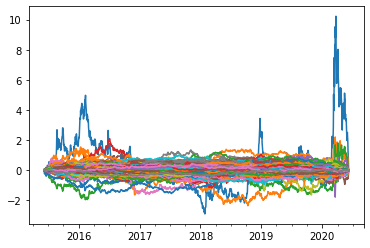

In [ ]:
from sklearn.decomposition import PCA


def fit_pca(returns, num_factor_exposures, svd_solver):
    
    pca = PCA(n_components = num_factor_exposures, svd_solver = svd_solver).fit(returns)
    return pca


num_factor_exposures = num_components
pca = fit_pca(five_year_returns, num_factor_exposures, 'full')
def factor_betas(pca, factor_beta_indices, factor_beta_columns):
   
    assert len(factor_beta_indices.shape) == 1
    assert len(factor_beta_columns.shape) == 1
    
    
    
    return pd.DataFrame(pca.components_.T, factor_beta_indices, factor_beta_columns)
risk_model = {}
risk_model['factor_betas'] = factor_betas(pca, five_year_returns.columns.values, np.arange(num_factor_exposures))

risk_model['factor_betas']
def factor_returns(pca, returns, factor_return_indices, factor_return_columns):
   
    assert len(factor_return_indices.shape) == 1
    assert len(factor_return_columns.shape) == 1
    
    
    
    return pd.DataFrame(pca.transform(returns), factor_return_indices, factor_return_columns)
risk_model['factor_returns'] = factor_returns(
    pca,
    five_year_returns,
    five_year_returns.index,
    np.arange(num_factor_exposures))

risk_model['factor_returns'].cumsum().plot(legend=None)
def factor_cov_matrix(factor_returns, ann_factor):
    
    
    return np.diag(factor_returns.var(axis=0, ddof=1)*ann_factor)
ann_factor = 252
risk_model['factor_cov_matrix'] = factor_cov_matrix(risk_model['factor_returns'], ann_factor)

risk_model['factor_cov_matrix'].shape
def idiosyncratic_var_matrix(returns, factor_returns, factor_betas, ann_factor):
   
    common_returns = pd.DataFrame(np.dot(factor_returns, factor_betas.T), returns.index, returns.columns)
    
    idiosyncratic_returns = returns - common_returns
    
    return pd.DataFrame(factor_cov_matrix(idiosyncratic_returns, ann_factor), returns.columns, returns.columns)

risk_model['idiosyncratic_var_matrix'] = idiosyncratic_var_matrix(five_year_returns, risk_model['factor_returns'], risk_model['factor_betas'], ann_factor)

risk_model['idiosyncratic_var_matrix']
def idiosyncratic_var_vector(returns, idiosyncratic_var_matrix):
  
    
    return pd.DataFrame(np.diag(idiosyncratic_var_matrix), index = returns.columns)

risk_model['idiosyncratic_var_vector'] = idiosyncratic_var_vector(five_year_returns, risk_model['idiosyncratic_var_matrix'])

risk_model['idiosyncratic_var_vector'][:10]
def predict_portfolio_risk(factor_betas, factor_cov_matrix, idiosyncratic_var_matrix, weights):
   
    assert len(factor_cov_matrix.shape) == 2
    
    
    B = factor_betas.values
    S = idiosyncratic_var_matrix.values
    X = weights.values
    F = factor_cov_matrix
    
    return np.sqrt(X.T @ (B @ F @ B.T + S) @ X)[0][0]
all_weights = pd.DataFrame(np.repeat(1/len(universe_tickers), len(universe_tickers)), universe_tickers)

predict_portfolio_risk(
    risk_model['factor_betas'],
    risk_model['factor_cov_matrix'],
    risk_model['idiosyncratic_var_matrix'],
    all_weights)

In [ ]:
"""ann_factor=252
num_components=20
returns=five_year_returns
def fit_pca(num_components,df,svd_solver):
  pca=PCA(n_components=num_components,svd_solver=svd_solver)
  pca.fit(df)
  return pca
risk_model={}
pca=fit_pca(num_components,returns,svd_solver='full')
def factor_betas(pca,factor_betas_indices,factor_betas_columns):
  assert len(factor_betas_indices.shape) == 1
  assert len(factor_betas_columns.shape) == 1
  return pd.DataFrame(pca.components_.T,factor_betas_indices,factor_betas_columns)
risk_model['factor_betas']=factor_betas(pca,np.array(returns.columns),np.arange(num_components)) 

def factor_returns(pca,returns,factor_returns_indices,factor_returns_columns):
  assert len(factor_returns_indices.shape) == 1
  assert len(factor_returns_columns.shape) == 1
  return pd.DataFrame(pca.transform(returns),factor_returns_indices,factor_returns_columns)
risk_model['factor_returns']=factor_returns(pca,returns,np.array(returns.index),np.arange(num_components)) 
def factor_cov_matrix(factor_returns,ann_factor):
  return np.diag(factor_returns.var(axis=0,ddof=1)*ann_factor)
risk_model['factor_cov_matrix']=factor_cov_matrix(risk_model['factor_returns'],ann_factor) 

def idiosyncratic_var_matrix(factor_returns,ann_factor,factor_betas,returns):
  
  common_returns = pd.DataFrame(np.dot(factor_returns, factor_betas.T), returns.index, returns.columns)
    
  idiosyncratic_returns = returns - common_returns
    
  return pd.DataFrame(factor_cov_matrix(idiosyncratic_returns, ann_factor), returns.columns, returns.columns)
risk_model['idiosyncratic_var_matrix']=idiosyncratic_var_matrix(risk_model['factor_returns'].values,ann_factor,risk_model['factor_betas'].values,returns)
risk_model['factor_returns'].cumsum().plot(legend=None)
def idiosyncratic_var_vec(returns,idiosyncratic_var_matrix):
  return pd.Series(np.diag(idiosyncratic_var_matrix),returns.columns)
risk_model['idiosyncratic_var_vec']=idiosyncratic_var_vec(returns,risk_model['idiosyncratic_var_matrix'])

import cvxpy as cvx
def predict_portfolio_risk(factor_betas,factor_cov_matrix,idiosyncratic_var_matrix,weights):
  assert len(factor_cov_matrix.shape)==2
 
    
    
  B = factor_betas.values
  S = idiosyncratic_var_matrix.values
  X = weights.values
  F = factor_cov_matrix
  
  return np.sqrt(X.T @ (B @ F @ B.T + S) @ X)[0][0]
all_weights = pd.DataFrame(np.repeat(1/len(universe_tickers), len(universe_tickers)), universe_tickers)
calculated_risk=predict_portfolio_risk(
    risk_model['factor_betas'],
    risk_model['factor_cov_matrix'],
    risk_model['idiosyncratic_var_matrix'],
    all_weights)
print(calculated_risk)
"""



"ann_factor=252\nnum_components=20\nreturns=five_year_returns\ndef fit_pca(num_components,df,svd_solver):\n  pca=PCA(n_components=num_components,svd_solver=svd_solver)\n  pca.fit(df)\n  return pca\nrisk_model={}\npca=fit_pca(num_components,returns,svd_solver='full')\ndef factor_betas(pca,factor_betas_indices,factor_betas_columns):\n  assert len(factor_betas_indices.shape) == 1\n  assert len(factor_betas_columns.shape) == 1\n  return pd.DataFrame(pca.components_.T,factor_betas_indices,factor_betas_columns)\nrisk_model['factor_betas']=factor_betas(pca,np.array(returns.columns),np.arange(num_components)) \n\ndef factor_returns(pca,returns,factor_returns_indices,factor_returns_columns):\n  assert len(factor_returns_indices.shape) == 1\n  assert len(factor_returns_columns.shape) == 1\n  return pd.DataFrame(pca.transform(returns),factor_returns_indices,factor_returns_columns)\nrisk_model['factor_returns']=factor_returns(pca,returns,np.array(returns.index),np.arange(num_components)) \ndef fac

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/CHECK.csv')
df= pd.DataFrame(df)
selected_columns=df[['Symbol','GICS Sector']]
opi=pd.Series(df['Symbol'], index=df['GICS Sector'])
mydict = dict(zip(df['GICS Sector'], df['Symbol']))
print(mydict)
df_n=selected_columns.copy()

check=df_n['GICS Sector'].values
dic = {'Real Estate' : 10,
'Utilities' : 9,
'Communication Services' : 8,
'Information Technology' : 7,
'Financials' : 6,
'Health Care' : 5,
'Consumer Staples' : 4,	
'Consumer Discretionary' : 3,
'Industrials' : 2,
'Materials' : 1,
'Energy' : 0,
 }

se=[]
for i in check:
  se.append(dic[i])

sect=pd.Series(se, index=df_n['Symbol'])
#ticker=['EQT', 'IRM', 'ANTM', 'EW', 'HPE', 'AIZ', 'VRSN', 'AXP', 'LUV', 'JNPR', 'EXPD', 'INFO', 'NWL', 'VRTX', 'MHK', 'AVY', 'HBI', 'GT', 'FMC', 'M', 'GILD', 'XRX', 'UAL', 'FOX', 'PCG', 'TROW', 'UHS', 'INTC', 'INCY', 'KR', 'OKE', 'LH', 'MU', 'CVS', 'LEG', 'PPL', 'ADS', 'BA', 'KSS', 'LOW', 'NFLX', 'EA', 'UDR', 'FB', 'BLL',  'CTSH', 'ED', 'ADP', 'ALB', 'PRGO', 'NI', 'FLIR', 'TXT', 'SCG', 'PXD', 'BLK', 'WAT', 'PBCT', 'BIIB', 'IPG', 'DOV', 'HRB', 'REGN', 'EFX', 'ADSK', 'NLSN', 'APD', 'LYB', 'MCHP', 'MDLZ', 'AMGN', 'CMI', 'AAL', 'QCOM', 'ZTS', 'APH', 'URI', 'GPN', 'PH', 'PGR', 'PX', 'HAL', 'NTAP', 'NRG', 'F', 'PNR', 'WEC', 'SNA', 'MAS', 'GOOGL', 'TAP', 'IP', 'DUK', 'CINF', 'HD', 'LNC', 'PFG', 'CTAS', 'NEM', 'BSX', 'AEE', 'SIG', 'EXR', 'CCL', 'WBA', 'XLNX', 'SWK', 'FRT', 'SPGI', 'MS', 'MPC', 'EL', 'NVDA', 'APA', 'AJG', 'EXC', 'GRMN', 'UPS', 'GPC', 'PDCO', 'TEL', 'NKE', 'SYMC', 'ALGN', 'HCP', 'SYY', 'BWA', 'SBAC', 'AOS', 'ULTA', 'KORS', 'DLR', 'QRVO', 'DXC', 'AYI', 'IR', 'CI', 'SLB', 'NTRS', 'FLS', 'L', 'MET', 'IVZ', 'GS', 'RJF', 'CMA', 'MO', 'LLL', 'DRI', 'DLTR', 'WMB', 'FBHS', 'GM', 'PFE', 'WRK', 'GGP', 'LMT', 'BBT', 'DVN', 'PG', 'SBUX', 'TDG', 'WHR', 'MGM', 'ETR', 'IFF', 'WYN', 'CPB', 'FL', 'ANSS', 'VZ', 'FAST', 'TGT', 'CL', 'BEN', 'HSIC', 'EQIX', 'OXY', 'MCD', 'ROP', 'BAX', 'ABBV', 'EQR', 'VRSK', 'LEN', 'CCI', 'XYL', 'FFIV', 'ETN', 'FIS', 'KMB', 'INTU', 'KIM', 'LUK', 'PLD', 'CTL', 'ABT', 'CMG', 'TXN', 'FE', 'ICE', 'NEE', 'DRE', 'MAT', 'VLO', 'FCX', 'PAYX', 'CSX', 'DISCK', 'TIF', 'CAG', 'JPM', 'MSFT', 'K', 'WLTW', 'PYPL', 'IDXX', 'EXPE', 'JNJ', 'MCO', 'PEP', 'HSY', 'AMZN', 'JCI', 'AET', 'TRIP', 'CRM', 'FLR', 'MSI', 'VAR', 'TMO', 'ADI', 'AZO', 'CME', 'ADM', 'SWKS', 'JBHT', 'DHI', 'SCHW', 'GLW', 'CSCO', 'WU', 'MRO', 'VIAB', 'ALK', 'ETFC', 'GWW', 'TRV', 'SNI', 'STI', 'VTR', 'FTI', 'CLX', 'AAP', 'DHR', 'NUE', 'PSX', 'XOM', 'DE', 'VNO', 'AON', 'BK', 'CXO', 'XRAY', 'ADBE', 'DISCA', 'MDT', 'ORLY', 'CNC', 'CHTR', 'AKAM', 'ZION', 'CB', 'CF', 'MA', 'CHRW', 'DFS', 'HES', 'NDAQ', 'KMI', 'CFG', 'HON', 'HCA', 'FITB', 'MAR', 'AEP', 'KLAC', 'NOV', 'TSN', 'DGX', 'PPG', 'XEC', 'LRCX', 'PM', 'XEL', 'REG', 'CA', 'BAC', 'ANDV', 'EOG', 'PSA', 'CMS', 'RTN', 'MTB', 'CBOE', 'AMP', 'AFL', 'BCR', 'CBG', 'FOXA', 'PNC', 'APC', 'PCAR', 'NSC', 'CAT', 'CBS', 'PKG', 'ITW', 'BBY', 'COP', 'HOLX', 'RHI', 'RRC', 'BMY', 'HAS', 'LNT', 'KEY', 'ARNC', 'MOS', 'JEC', 'WM', 'RF', 'ISRG', 'MRK', 'KO', 'A', 'SRE', 'EIX', 'UTX', 'PEG', 'RCL', 'ZBH', 'ARE', 'NWS', 'SNPS', 'PWR', 'GIS', 'RL', 'UNM', 'ALLE', 'AGN', 'MAA', 'COG', 'SYK', 'C', 'HLT', 'DAL', 'JWN', 'ORCL', 'WDC', 'ROK', 'KSU', 'ALXN', 'SHW', 'RE', 'HOG', 'SRCL', 'WY', 'TSCO', 'AMT', 'TSS', 'NOC', 'GOOG', 'LKQ', 'SJM', 'DIS', 'PHM', 'AIV', 'HRL', 'NAVI', 'SEE', 'DPS', 'MMC', 'NBL', 'MYL', 'VMC', 'WFC', 'FDX', 'CHD', 'PRU', 'HST', 'ABC', 'KMX', 'PVH', 'UNH', 'CNP', 'RHT', 'RSG', 'SLG', 'DVA', 'GE', 'HPQ', 'WYNN', 'OMC', 'EMR', 'PNW', 'HCN', 'SO', 'AWK', 'O', 'EBAY', 'COTY', 'AMG', 'LLY', 'AES', 'DISH', 'STT', 'USB', 'AIG', 'HBAN', 'ALL', 'ATVI', 'TJX', 'KHC', 'AMD', 'FISV', 'NFX', 'UA', 'YUM', 'MKC', 'ES', 'COF', 'AVGO', 'STX', 'D', 'TMK', 'LB', 'GD', 'DTE', 'SYF', 'BDX', 'COO', 'UAA', 'HIG', 'CELG', 'XL', 'HUM', 'MNST', 'T', 'HRS', 'BXP', 'WMT', 'CAH', 'LVLT', 'MAC', 'NWSA', 'CERN', 'MON', 'AME', 'EMN', 'RMD', 'HP', 'MTD', 'UNP', 'MLM', 'CTXS', 'EVHC', 'ILMN', 'VFC', 'ECL', 'STZ', 'MCK', 'IT', 'IBM', 'V', 'ACN', 'SPLS', 'DG', 'FTV', 'PKI', 'GPS', 'CHK', 'SPG', 'CMCSA', 'ROST', 'AAPL', 'CVX']
not_found=['AET', 'AGN', 'AMG', 'ARNC', 'AYI', 'CBS', 'CHK', 'EQT', 'FL', 'FLR', 'GT', 'HP', 'JEC', 'M', 'MAC', 'MAT', 'MON', 'NAVI', 'PCG', 'PDCO', 'RRC', 'RTN', 'SCG', 'SIG', 'SRCL', 'STI', 'TRIP', 'UTX', 'XEC']
print()
sector=[]
cnt=0
not_found=[]
for i in u_ticker:

  try:
    sector.append(sect[i])
  except KeyError:
    cnt+=1
    if(i=='AET'):
      sector.append(dic['Industrials'])
    elif(i=='AGN'):
      sector.append(dic['Health Care'])
    elif(i=='AMG'):
      sector.append(dic['Financials'])
    else:
      sector.append(np.random.randint(0,10))
print(cnt)
print(not_found)
sector=np.array(sector)


{'Industrials': 'XYL', 'Health Care': 'ZTS', 'Information Technology': 'ZBRA', 'Communication Services': 'DIS', 'Consumer Discretionary': 'YUM', 'Utilities': 'XEL', 'Financials': 'ZION', 'Materials': 'WRK', 'Real Estate': 'WY', 'Consumer Staples': 'WBA', 'Energy': 'WMB'}

21
[]


In [ ]:
from zipline.pipeline.classifiers import Classifier
from zipline.utils.numpy_utils import int64_dtype
class Sector(Classifier):
    dtype = int64_dtype
    window_length = 0
    inputs = ()
    missing_value = -1
    
    def __init__(self):
        self.data = sector
    def _compute(self, arrays, dates, assets, mask):
        
        
        return np.where(
            mask,
            self.data[assets],
            self.missing_value,
        )

In [ ]:
sectors=Sector()

In [ ]:
print(f"set of unique categories: {set(sectors.data)}")
print(len(sectors.data))

set of unique categories: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
449


In [ ]:
from zipline.pipeline.factors import Returns
def momentum_by_1yr(window_length,universe,sectors):
  return (Returns(window_length=window_length,mask=universe).demean(groupby=sectors)).rank().zscore()



In [ ]:
def mean_reversion_5day_sector_neutral(window_length,universe,sectors):
  factor= -(Returns(window_length=window_length,mask=universe).demean(groupby=sectors).rank().zscore())
  return factor
factor_start_date=universe_end_date-pd.DateOffset(years=2)




In [ ]:
from zipline.pipeline.factors import SimpleMovingAverage
def mean_reversion_5day_sector_neutral_smooth(window_length,universe,sectors):
  factor= mean_reversion_5day_sector_neutral(window_length,universe,sectors)
  factor_smooth=SimpleMovingAverage(inputs=[factor],window_length=window_length).rank().zscore()
  return factor_smooth





In [ ]:
class closetoopen(Returns):
  inputs=[USEquityPricing.open,USEquityPricing.close]
  
  def compute(self,today,assets,out,open,close):
    out[:]=(open[-1]-close[0])/close[0]
class TrailingReturns(Returns):
  def compute(self,today,assets,out,price):
    out[:]=np.nansum(price,axis=0)
def overnight_sentiment(cto_window_length,trailing_window_length,universe,sectors):
  cto_out=closetoopen(window_length=cto_window_length,mask=universe)
  return (TrailingReturns(window_length=trailing_window_length,inputs=[cto_out],mask=universe).demean(groupby=sectors)).rank().zscore()




  

In [ ]:
def smooth_overnight_sentiment(cto_window_length,trailing_window_length,universe,sectors):
 
  factor=overnight_sentiment(cto_window_length,trailing_window_length,universe,sectors)
  smooth_factor=SimpleMovingAverage(inputs=[factor],window_length=5).rank().zscore()
  return smooth_factor



In [ ]:
p2=Pipeline(screen=universe)
window_length=252
p2.add(momentum_by_1yr(window_length,universe,sectors), 'Momentum_1YR_demean_by_sector')
factor_start_date=universe_end_date-pd.DateOffset(years=2)
cto_window_length=2
trailing_window_length=5
window_length=5

p2.add(mean_reversion_5day_sector_neutral(window_length,universe,sectors),'MEAN_REVERSION_5DAY_SECTOR_NEUTRAL')
p2.add(mean_reversion_5day_sector_neutral_smooth(window_length,universe,sectors),'SMOOTH_MEAN_REVERSION_5DAY_SECTOR_NEUTRAL')
p2.add(overnight_sentiment(cto_window_length,trailing_window_length,universe,sectors),'OVERNIGHT_SENTIMENTS')
p2.add(smooth_overnight_sentiment(cto_window_length,trailing_window_length,universe,sectors),'SMOOTH_OVERNIGHT_SENTIMENTS')
all_factors=engine.run_pipeline(p2,factor_start_date,universe_end_date)


IndexError: ignored

In [ ]:
print(all_factors.head())

In [ ]:
assets=all_factors.index.levels[1].values.tolist()
pricing=get_pricing(data_portal,assets,trading_calendar,factor_start_date,universe_end_date)


In [ ]:
import alphalens as al

In [ ]:
clean_factor_data = {
    factor: al.utils.get_clean_factor_and_forward_returns(factor=factor_data, prices=pricing, periods=[1])
    for factor, factor_data in all_factors.iteritems()}

unixt_factor_data = {
    factor: factor_data.set_index(pd.MultiIndex.from_tuples(
        [(x.timestamp(), y) for x, y in factor_data.index.values],
        names=['date', 'asset']))
    for factor, factor_data in clean_factor_data.items()}
ls_factor_returns = pd.DataFrame()

for factor, factor_data in clean_factor_data.items():
    ls_factor_returns[factor] = al.performance.factor_returns(factor_data).iloc[:, 0]

(1+ls_factor_returns).cumprod().plot()
qr_factor_returns = pd.DataFrame()

for factor, factor_data in unixt_factor_data.items():
    qr_factor_returns[factor] = al.performance.mean_return_by_quantile(factor_data)[0].iloc[:, 0]

(10000*qr_factor_returns).plot.bar(
    subplots=True,
    sharey=True,
    layout=(4,2),
    figsize=(14, 14),
    legend=False)
def sharpe_ratio(factor_returns, annualization_factor):
  
    sharpe_ratio = annualization_factor * factor_returns.mean() / factor_returns.std()
    
    return sharpe_ratio
daily_annualization_factor = np.sqrt(252)
sharpe_ratio(ls_factor_returns, daily_annualization_factor).round(2)


In [ ]:
selected_factors = all_factors.columns[[1,4,3]]
print('Selected Factors: {}'.format(', '.join(selected_factors)))

all_factors['alpha_vector'] = all_factors[selected_factors].mean(axis=1)

all_factors['alpha_vector'] = all_factors['alpha_vector'].replace(np.nan, np.mean(all_factors['alpha_vector'].values))
all_factors=all_factors.apply(lambda x: x.fillna(x.mean()),axis=0)
alphas = all_factors[['alpha_vector']]
alpha_vector = alphas.loc[all_factors.index.get_level_values(0)[-1]]


In [ ]:
print((risk_model['factor_betas']).shape, (risk_model['factor_cov_matrix']).shape, (risk_model['idiosyncratic_var_vector']).shape)
print(alpha_vector.shape)

In [ ]:
alpha_vector_index=alpha_vector.index
factor_betas=risk_model['factor_betas']
factor_cov_matrix=risk_model['factor_cov_matrix']
idiosyncratic_var_vector=risk_model['idiosyncratic_var_vector']
print((factor_betas.loc[alpha_vector_index].values.T).shape)
print(factor_cov_matrix.shape)
print((np.diag(idiosyncratic_var_vector.loc[alpha_vector_index].values.flatten())).shape)
print(len(alpha_vector))
        

In [ ]:
from abc import ABC, abstractmethod


class AbstractOptimalHoldings(ABC):    
    @abstractmethod
    def _get_obj(self, weights, alpha_vector):
      
        raise NotImplementedError()
    
    @abstractmethod
    def _get_constraints(self, weights, factor_betas, risk):
       
        raise NotImplementedError()
        
    def _get_risk(self, weights, factor_betas, alpha_vector_index, factor_cov_matrix, idiosyncratic_var_vector):
        f = factor_betas.loc[alpha_vector_index].values.T * weights
        X = factor_cov_matrix
        S = np.diag(idiosyncratic_var_vector.loc[alpha_vector_index].values.flatten())
        
        return cvx.quad_form(f, X) + cvx.quad_form(weights, S)
    
    def find(self, alpha_vector, factor_betas, factor_cov_matrix, idiosyncratic_var_vector):
        weights = cvx.Variable(len(alpha_vector))
        risk = self._get_risk(weights, factor_betas, alpha_vector.index, factor_cov_matrix, idiosyncratic_var_vector)
        
        obj = self._get_obj(weights, alpha_vector)
        constraints = self._get_constraints(weights, factor_betas.loc[alpha_vector.index].values, risk)
        
        prob = cvx.Problem(obj, constraints)
      
        prob.solve(max_iters=500,verbose=True)
   

        optimal_weights = np.asarray(weights.value).flatten()
        
        return pd.DataFrame(data=optimal_weights, index=alpha_vector.index)

In [ ]:

from cvxpy.reductions.solvers.solver import Solver

class OptimalHoldings(AbstractOptimalHoldings):
    def _get_obj(self, weights, alpha_vector):
      
        
        assert(len(alpha_vector.columns) == 1)
        
        objective = cvx.Maximize(alpha_vector.T.values * weights)
        
        return objective
    
    def _get_constraints(self, weights, factor_betas, risk):
       
        assert(len(factor_betas.shape) == 2)
        
        
        constraints = [risk <= self.risk_cap**2,
                        factor_betas.T * weights <= self.factor_max,
                        factor_betas.T * weights >= self.factor_min,
                        sum(weights) == 0.0,
                        sum(cvx.abs(weights)) <= 1.0,
                        weights >= self.weights_min,
                        weights <= self.weights_max]
        return constraints

    def __init__(self, risk_cap=0.05, factor_max=10.0, factor_min=-10.0, weights_max=0.55, weights_min=-0.55):
        self.risk_cap=risk_cap
        self.factor_max=factor_max
        self.factor_min=factor_min
        self.weights_max=weights_max
        self.weights_min=weights_min

In [ ]:
optimal_weights = OptimalHoldings().find(alpha_vector, risk_model['factor_betas'], risk_model['factor_cov_matrix'], risk_model['idiosyncratic_var_vector'])
print(optimal_weights)
optimal_weights.plot.bar(legend=None, title='Portfolio % Holdings by Stock')
x_axis = plt.axes().get_xaxis()
x_axis.set_visible(False)
factor_betas.loc[optimal_weights.index].T.dot(optimal_weights).plot.bar(
    title='Portfolio Net Factor Exposures',
    legend=False)

In [ ]:
class OptimalHoldingsRegualization(OptimalHoldings):
    def _get_obj(self, weights, alpha_vector):
       
        assert(len(alpha_vector.columns) == 1)
        
        
        return cvx.Maximize((alpha_vector.T.values*weights) - (self.lambda_reg * cvx.norm(weights,2)))

    def __init__(self, lambda_reg=0.5, risk_cap=0.05, factor_max=10.0, factor_min=-10.0, weights_max=0.55, weights_min=-0.55):
        self.lambda_reg = lambda_reg
        self.risk_cap=risk_cap
        self.factor_max=factor_max
        self.factor_min=factor_min
        self.weights_max=weights_max
        self.weights_min=weights_min


ECOS 2.0.7 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  +1.529e-15  -1.121e+04  +4e+05  4e-01  7e-01  1e+00  1e+00    ---    ---    1  1  - |  -  - 
 1  -9.489e+00  -1.591e+03  +6e+04  5e-02  1e-01  3e-01  1e-01  0.9890  1e-01   2  2  2 |  0  0
 2  -5.322e+00  -5.484e+02  +2e+04  2e-02  5e-02  1e-01  4e-02  0.8354  2e-01   3  2  2 |  0  0
 3  -9.674e-01  -2.311e+01  +7e+02  6e-04  2e-03  5e-03  2e-03  0.9681  1e-02   3  2  2 |  0  0
 4  -4.911e-01  -4.815e+00  +1e+02  1e-04  4e-04  9e-04  4e-04  0.8002  4e-03   6  5  5 |  0  0
 5  -2.798e-01  -7.681e-01  +2e+01  1e-05  3e-05  1e-04  4e-05  0.9159  3e-02   4  7  7 |  0  0
 6  -2.691e-01  -3.036e-01  +1e+00  1e-06  2e-06  8e-06  3e-06  0.9577  3e-02   3  3  2 |  0  0
 7  -2.683e-01  -2.734e-01  +2e-01  1e-07  3e-07  1e-06  4e-07  0.8742  2e-02   2  2  2 |  0  0
 8  -2.685e-01  -2.699e-01  +4e-02  4e-08  9e-

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


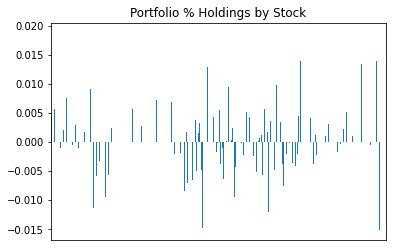

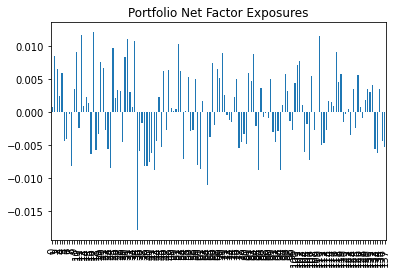

In [ ]:
optimal_weights_1 = OptimalHoldingsRegualization(lambda_reg=5.0).find(alpha_vector, risk_model['factor_betas'], risk_model['factor_cov_matrix'], risk_model['idiosyncratic_var_vector'])
print(optimal_weights)
optimal_weights_1.plot.bar(legend=None, title='Portfolio % Holdings by Stock')
x_axis = plt.axes().get_xaxis()
x_axis.set_visible(False)
factor_betas.loc[optimal_weights_1.index].T.dot(optimal_weights_1).plot.bar(
    title='Portfolio Net Factor Exposures',
    legend=False)

In [ ]:
class OptimalHoldingsStrictFactor(OptimalHoldings):
    def _get_obj(self, weights, alpha_vector):
       
        assert(len(alpha_vector.columns) == 1)
        
        
        alpha_vector_norm = ((alpha_vector.values - alpha_vector.values.mean()) / np.sum(np.abs(alpha_vector.values))).flatten()
        objective = cvx.Maximize(((alpha_vector.T.values)*weights)-(cvx.norm(weights - alpha_vector_norm))-(self.lambda_reg*cvx.norm(weights,2)))
        
        return objective
    def __init__(self, lambda_reg=0.1, risk_cap=0.0015, factor_max=0.015, factor_min=-0.015, weights_max=0.02, weights_min=-0.02):
        self.lambda_reg = lambda_reg
        self.risk_cap=risk_cap
        self.factor_max=factor_max
        self.factor_min=factor_min
        self.weights_max=weights_max
        self.weights_min=weights_min




ECOS 2.0.7 - (C) embotech GmbH, Zurich Switzerland, 2012-15. Web: www.embotech.com/ECOS

It     pcost       dcost      gap   pres   dres    k/t    mu     step   sigma     IR    |   BT
 0  -1.573e-08  -3.694e+01  +4e+05  1e+00  1e+00  1e+00  1e+00    ---    ---    1  1  - |  -  - 
 1  -2.294e+01  -2.762e+01  +6e+04  8e-02  4e-01  1e-01  2e-01  0.9601  1e-01   2  2  2 |  0  0
 2  -2.072e+00  -2.674e+00  +4e+04  1e-02  2e-02  2e-01  9e-02  0.7422  4e-01   3  3  3 |  0  0
 3  -1.436e+00  -1.620e+00  +1e+04  4e-03  7e-03  6e-02  3e-02  0.7001  3e-02   3  3  3 |  0  0
 4  -1.182e+00  -1.273e+00  +5e+03  2e-03  3e-03  2e-02  1e-02  0.6628  1e-01   4  4  4 |  0  0
 5  -9.644e-01  -1.004e+00  +2e+03  7e-04  1e-03  8e-03  5e-03  0.6730  1e-01   4  4  4 |  0  0
 6  -7.909e-01  -8.004e-01  +4e+02  2e-04  2e-04  9e-04  1e-03  0.8929  1e-01   5  5  6 |  0  0
 7  -7.501e-01  -7.527e-01  +1e+02  4e-05  6e-05  2e-04  3e-04  0.7369  1e-02   5  5  5 |  0  0
 8  -7.411e-01  -7.422e-01  +5e+01  2e-05  3e-

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


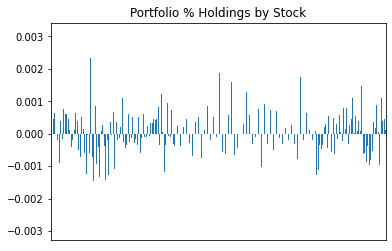

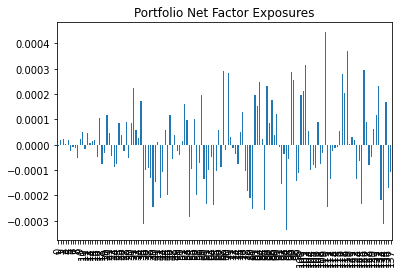

In [ ]:
optimal_weights_2 = OptimalHoldingsStrictFactor(lambda_reg=0.01,
    weights_max=0.02,
    weights_min=-0.02,
    risk_cap=0.0015,
    factor_max=0.015,
    factor_min=-0.015).find(alpha_vector, risk_model['factor_betas'], risk_model['factor_cov_matrix'], risk_model['idiosyncratic_var_vector'])

optimal_weights_2.plot.bar(legend=None, title='Portfolio % Holdings by Stock')
x_axis = plt.axes().get_xaxis()
x_axis.set_visible(False)

factor_betas.loc[optimal_weights_2.index].T.dot(optimal_weights_2).plot.bar(
    title='Portfolio Net Factor Exposures',
    legend=False)


In [ ]:
print(set(assets)^set(optimal_weights_2.index.values))

print(optimal_weights_2.iloc[u_ticker.index('ACN')])
print(optimal_weights_2.iloc[u_ticker.index('AAPL')])
print(optimal_weights_2.iloc[u_ticker.index('NKE')])

{Equity(17 [AET]), Equity(19 [AGN]), Equity(74 [CBS]), Equity(232 [JEC]), Equity(284 [MON]), Equity(367 [RTN]), Equity(385 [STI]), Equity(420 [UTX])}
0   -0.000008
Name: Equity(7 [ACN]), dtype: float64
0    0.000447
Name: Equity(3 [AAPL]), dtype: float64
0   -0.000327
Name: Equity(303 [NLSN]), dtype: float64


                               0
asset                           
Equity(0 [A])      -9.058980e-05
Equity(1 [AAL])     3.346321e-04
Equity(2 [AAP])    -6.155739e-05
Equity(3 [AAPL])    4.470614e-04
Equity(4 [ABBV])    6.252340e-04
Equity(5 [ABC])    -6.366595e-05
Equity(6 [ABT])    -1.431647e-04
Equity(7 [ACN])    -8.072859e-06
Equity(8 [ADBE])   -2.064446e-04
Equity(9 [ADI])    -8.852623e-07
Equity(10 [ADM])   -5.056576e-05
Equity(11 [ADP])   -9.137184e-04
Equity(12 [ADS])    3.778038e-04
Equity(13 [ADSK])   1.668920e-05
Equity(14 [AEE])    7.328788e-04
Equity(15 [AEP])   -1.631108e-04
Equity(16 [AES])    7.755736e-04
Equity(18 [AFL])   -9.168899e-04
Equity(20 [AIG])   -1.101672e-04
Equity(21 [AIV])    5.934916e-04
Equity(22 [AIZ])    6.202780e-04
Equity(23 [AJG])    4.095995e-04
Equity(24 [AKAM])   1.383113e-03
Equity(25 [ALB])    4.527327e-04
Equity(26 [ALGN])   1.203631e-04
Equity(27 [ALK])   -4.685554e-05
Equity(28 [ALL])    4.860120e-06
Equity(29 [ALLE])  -4.155393e-04
Equity(30 

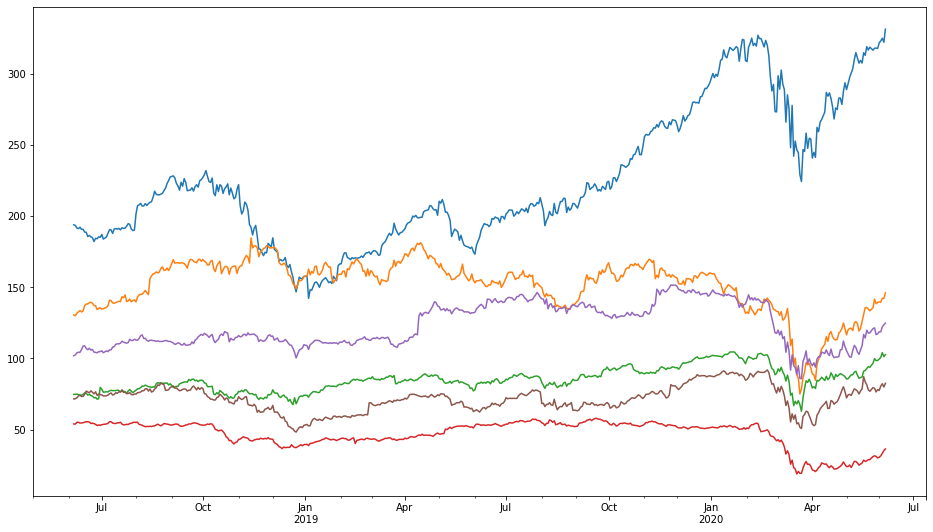

In [ ]:
(pricing[pricing.columns[3]]).plot(figsize=(16,9))

(pricing[pricing.columns[2]]).plot(figsize=(16,9))
(pricing[pricing.columns[301]]).plot(figsize=(16,9))
(pricing[pricing.columns[20]]).plot(figsize=(16,9))
(pricing[pricing.columns[119]]).plot(figsize=(16,9))
(pricing[pricing.columns[56]]).plot(figsize=(16,9))
plt.show()